In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split

# Dataset 
- UCI adult
- UCI housing 

In [2]:
housing_names = ["f" + str(i) for i in range(13)] + ["price"]
adult_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours",
    "native",
    "class"
]
housing = pd.read_fwf("housing.fwf", names=housing_names)
adult = pd.read_csv("adult.data", names=adult_names)

In [3]:
print("housing size:",housing.shape)
print("adult size:",adult.shape)

housing size: (506, 14)
adult size: (32561, 15)


In [4]:
adult.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
13703,47,Self-emp-not-inc,131826,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
23880,68,?,40956,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
16014,24,Private,141113,7th-8th,4,Married-civ-spouse,Sales,Husband,White,Male,2580,0,40,United-States,<=50K


In [5]:
housing.sample(3)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,price
109,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384.0,20.9,391.23,15.55,19.4
12,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311.0,15.2,390.50,15.71,21.7
22,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2


# Preprocessing

## Convert to categorical datatype

In [6]:
encoder = LabelEncoder()

for col in adult_names:
    if adult[col].dtype == "object":
        adult[col] = encoder.fit_transform(adult[col])

## Normalization

In [7]:
scaler = MinMaxScaler()
adult = scaler.fit_transform(adult)
housing = scaler.fit_transform(housing)

## Train test split

In [8]:
X_adult, y_adult = adult[:, :-1], adult[:, -1]
X_housing, y_housing = housing[:, :-1], housing[:, -1]
print(X_adult.shape, y_adult.shape)
print(X_housing.shape, y_housing.shape)

(32561, 14) (32561,)
(506, 13) (506,)


In [9]:
x_train_adult, x_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, train_size=0.8)
x_train_housing, x_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, train_size=0.8)

In [10]:
x_train_adult.shape, x_test_adult.shape, y_train_adult.shape, y_test_adult.shape

((26048, 14), (6513, 14), (26048,), (6513,))

## Modeling

### Model 1 - Classification - MSE loss function: adult dataset

In [11]:
ad_mse = Sequential([
    Dense(units=10, input_dim= X_adult.shape[1], activation="relu"),
    Dense(units=24,activation="relu"),
    Dense(units=16,activation="relu"),
    Dense(units=8, activation="relu"),
    Dense(units=1, activation="sigmoid")
])
ad_mse.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 dense_1 (Dense)             (None, 24)                264       
                                                                 
 dense_2 (Dense)             (None, 16)                400       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 959
Trainable params: 959
Non-trainable params: 0
_________________________________________________________________


In [12]:
ad_mse.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [13]:
history_ad_mse = ad_mse.fit(x_train_adult, y_train_adult, epochs=10, validation_split=0.2, verbose=0)

Epoch 1/10
652/652 [==============================] - 1s 2ms/step - loss: 0.1580 - accuracy: 0.7705 - val_loss: 0.1329 - val_accuracy: 0.8138
Epoch 2/10
652/652 [==============================] - 1s 2ms/step - loss: 0.1258 - accuracy: 0.8193 - val_loss: 0.1117 - val_accuracy: 0.8403
Epoch 3/10
652/652 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.8334 - val_loss: 0.1085 - val_accuracy: 0.8420
Epoch 4/10
652/652 [==============================] - 1s 2ms/step - loss: 0.1115 - accuracy: 0.8364 - val_loss: 0.1070 - val_accuracy: 0.8466
Epoch 5/10
652/652 [==============================] - 1s 1ms/step - loss: 0.1102 - accuracy: 0.8379 - val_loss: 0.1042 - val_accuracy: 0.8507
Epoch 6/10
652/652 [==============================] - 1s 1ms/step - loss: 0.1089 - accuracy: 0.8401 - val_loss: 0.1040 - val_accuracy: 0.8518
Epoch 7/10
652/652 [==============================] - 1s 2ms/step - loss: 0.1087 - accuracy: 0.8385 - val_loss: 0.1055 - val_accuracy: 0.8470
Epoch 

In [14]:
import matplotlib.pyplot as plt

In [15]:
def plot_history(history, metrics, model_name:str):
    fig = plt.figure(figsize=[8, 4])
    for metric in metrics:
        plt.plot(history.history[metric], label='train '+ metric)
        plt.plot(history.history['val_' + metric], label='val ' + metric)        
    plt.legend()    
    plt.xlabel('epoch')
    plt.ylabel(" ".join(metrics))
    plt.grid(visible=True)
    plt.title(model_name + " training history [" + " ".join(metrics) + "]")

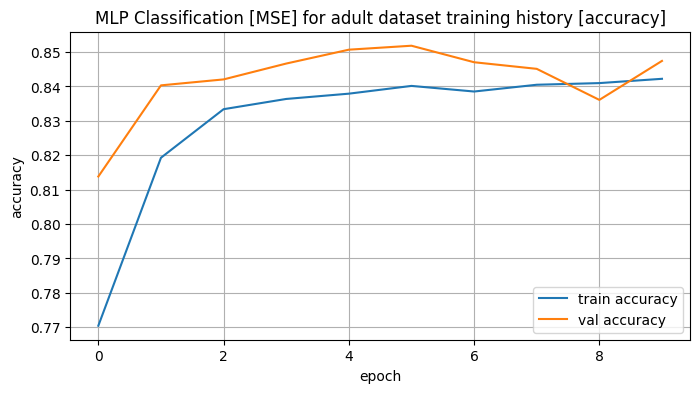

In [16]:
plot_history(history=history_ad_mse, metrics=["accuracy"],model_name="MLP Classification [MSE] for adult dataset")

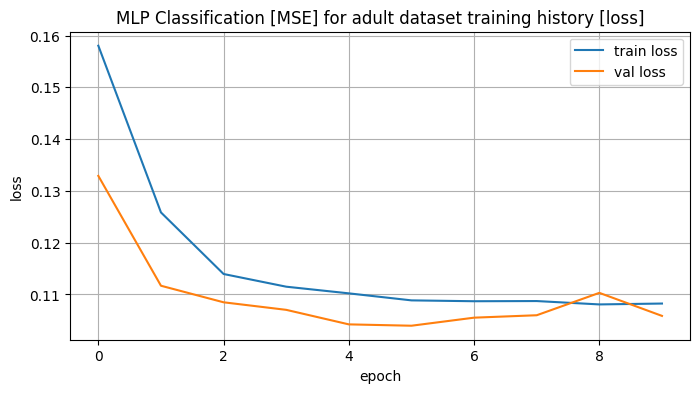

In [17]:
plot_history(history=history_ad_mse, metrics=["loss"], model_name="MLP Classification [MSE] for adult dataset")

model 1 evaluation

In [18]:
# model 1
result_ad_mse = ad_mse.evaluate(x_test_adult, y_test_adult)

204/204 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.8466


### Model 2 - Classification - CCE loss function: Adult

In [19]:
ad_cce = Sequential([
    Dense(units=24, input_dim= X_adult.shape[1], activation="relu"),
    Dense(units=32,activation="relu"),
    Dense(units=16,activation="relu"),
    Dense(units=8, activation="relu"),
    Dense(units=2, activation="softmax")
])
ad_cce.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 24)                360       
                                                                 
 dense_6 (Dense)             (None, 16)                400       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,186
Trainable params: 1,186
Non-trainable params: 0
_________________________________________________________________


In [20]:
ad_cce.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [21]:
history_ad_cce = ad_cce.fit(x_train_adult, y_train_adult, epochs=10, verbose=0, validation_split=0.2)

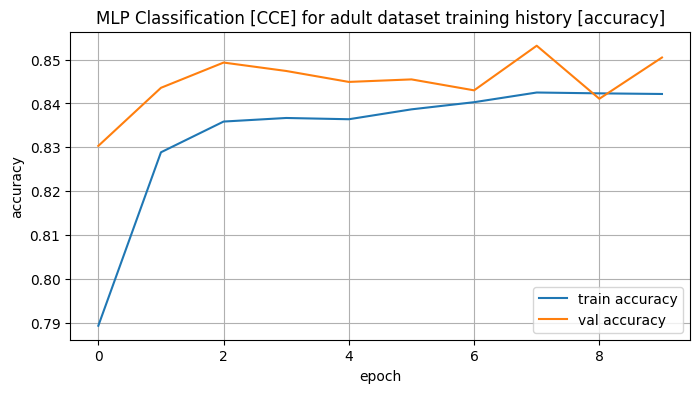

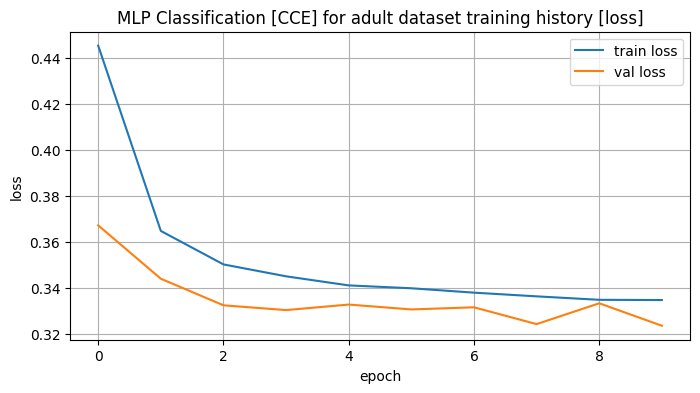

In [22]:
plot_history(history_ad_cce, metrics=["accuracy"], model_name="MLP Classification [CCE] for adult dataset")
plot_history(history_ad_cce, metrics=["loss"],model_name="MLP Classification [CCE] for adult dataset")

In [23]:
# model 2
result_ad_cce = ad_cce.evaluate(x_test_adult, y_test_adult)

204/204 [==============================] - 0s 1ms/step - loss: 0.3264 - accuracy: 0.8492
